In [2]:
from google.colab import drive
import os
if 'google.colab' in str(get_ipython()):
  drive.mount('/content/gdrive')
  os.chdir('/content/gdrive/MyDrive/Benchmarking-Distributional-Alignment-of-Small-Language-Models')

Mounted at /content/gdrive


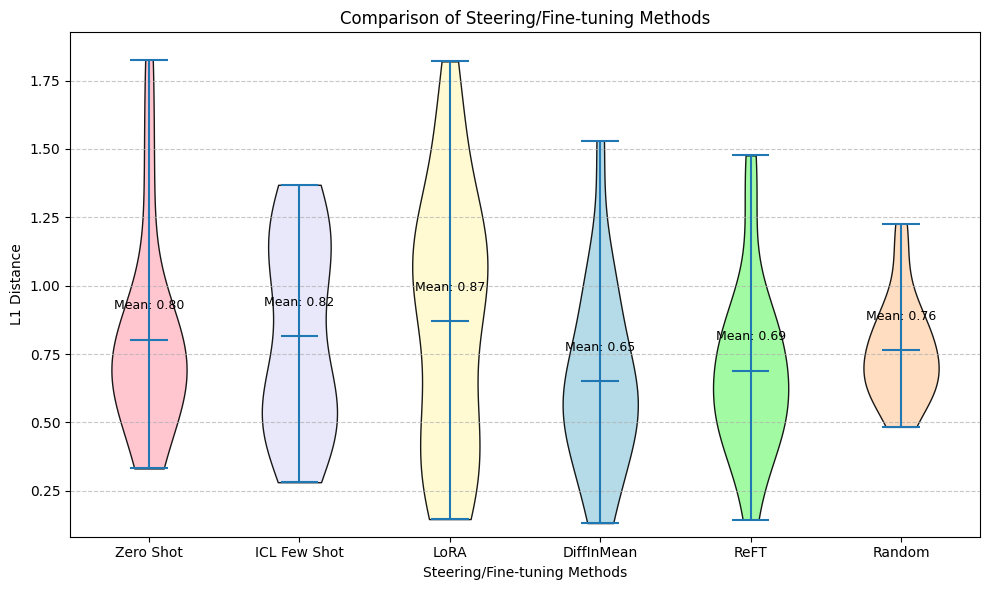

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import json

json_files = ['distance_zs.json', 'distance_icl.json', 'distance_lora.json', 'distance_reft.json', 'distance_reps.json', 'distance_random.json']
data = []
for file in json_files:
    with open(file, 'r') as f:
        data.append(json.load(f))
means = [np.mean(d) for d in data]
petal_colors = ['#FFC0CB', '#E6E6FA', '#FFFACD', '#ADD8E6', '#98FB98', '#FFDAB9']  # Pink, Lavender, Pastel Yellow, Light Blue, Mint Green, Peach
plt.figure(figsize=(10, 6))
violin_parts = plt.violinplot(data, showmeans=True, showextrema=True)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(petal_colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.9)
for i, mean in enumerate(means, start=1):
    plt.text(i, mean + 0.1, f'Mean: {mean:.2f}', ha='center', va='bottom', fontsize=9)
plt.ylim(min(min(d) for d in data) - 0.05, max(max(d) for d in data) + 0.1)
plt.title('Comparison of Steering/Fine-tuning Methods')
plt.xlabel('Steering/Fine-tuning Methods')
plt.ylabel('L1 Distance')
plt.xticks(range(1, len(json_files) + 1), ["Zero Shot", "ICL Few Shot", "LoRA", "DiffInMean", "ReFT", "Random"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
